In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, svm

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()
figsize = (15, 10)

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

### data

In [4]:
dataset = datasets.load_iris()
X = dataset.data[:, :2]  # (150, 2)
Y = dataset.target  # (150,)

In [5]:
Y[:5]

array([0, 0, 0, 0, 0])

### modeling

In [6]:
C = 1.0

linear_svc = svm.LinearSVC(C=C)

linear_kernel = svm.SVC(kernel='linear', C=C)

degree = 4
polynomial_kernel = svm.SVC(kernel='poly', degree=degree, C=C)

gamma = 0.7
rbf_kernel = svm.SVC(kernel='rbf', gamma=gamma, C=C)

In [7]:
clfs = [linear_svc, linear_kernel, polynomial_kernel, rbf_kernel]

In [8]:
clfs = [clf.fit(X, Y) for clf in clfs]

/Users/dnguyen/Dinh/machine_learning/env/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### plotting

In [9]:
titles = ['LinearSVC',
          'SVC with linear kernel',
          f"SVC with degree-{degree} polynomial  kernel",
          f"SVC with gamma-{gamma} RBF kernel"]

In [10]:
X_0, X_1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X_0, X_1)

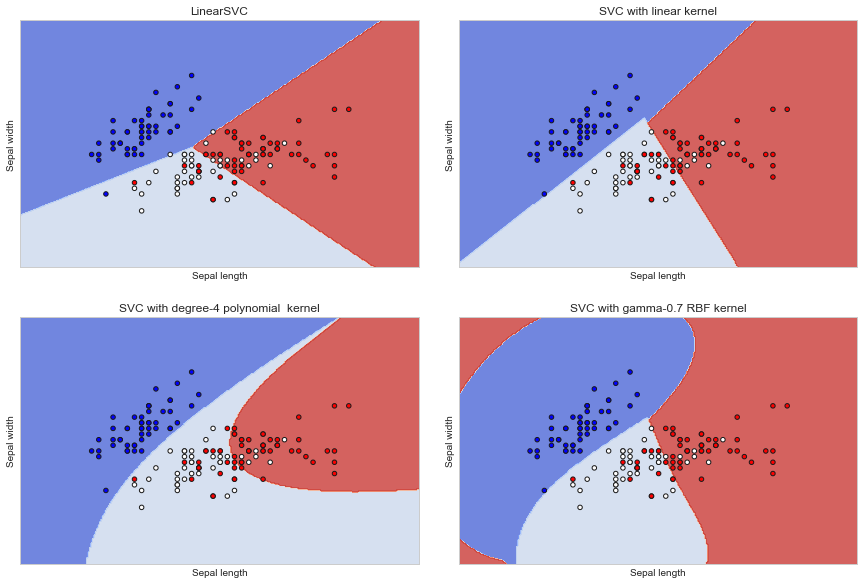

In [11]:
fig, axes = plt.subplots(2, 2, figsize=figsize)
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()

for clf, title, ax in zip(clfs, titles, axes):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_0, X_1, c=Y, cmap=plt.cm.bwr, s=20, edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)